In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Segment Code Plots
Below we include plots of segment code versus time for each of the eight pilots. Notice that the first and last segment code is shifted down one for each value.

## Pilot P8543

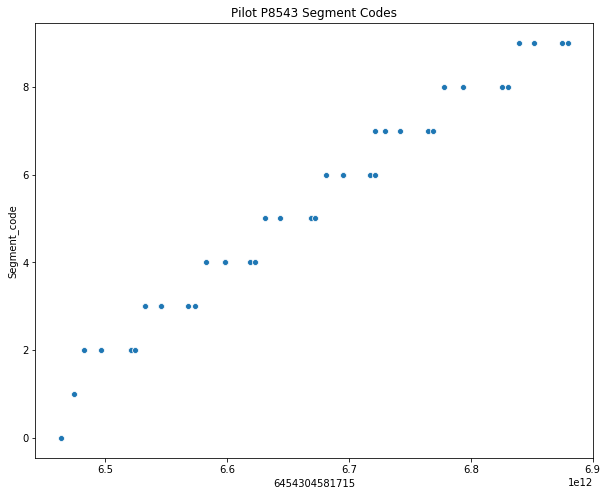

In [94]:
p8543 = pd.read_csv(r'C:\Users\Blake Bullwinkel\Downloads\WSSCGQWVS Corrected Sim Segments\BlueFlightSimData\AFRLAgent_6454302531282_P8543.txt',sep='	',skiprows=2)
p8543_waypoints = p8543[['6454304581715','Segment_code','WayPointCrossingEvent_code']].dropna()
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Pilot P8543 Segment Codes')
sns.scatterplot(x='6454304581715',y='Segment_code',data=p8543_waypoints)

## Pilot P5427

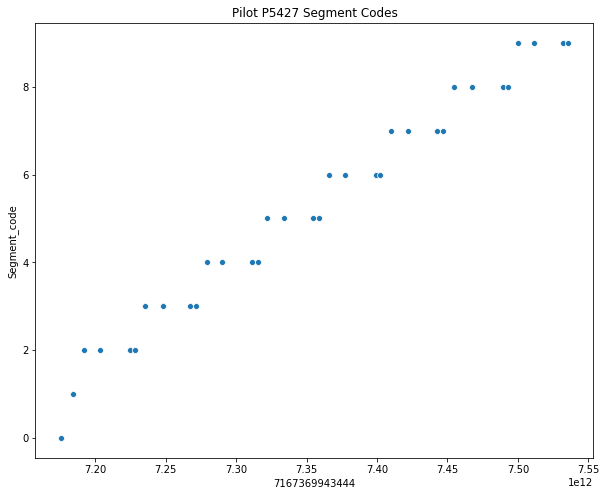

In [80]:
p5427 = pd.read_csv(r'C:\Users\Blake Bullwinkel\Downloads\WSSCGQWVS Corrected Sim Segments\BlueFlightSimData\AFRLAgent_7167357727955_P5427.txt',sep='	',skiprows=2)
p5427_waypoints = p5427[['7167369943444','Segment_code','WayPointCrossingEvent_code']].dropna()
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Pilot P5427 Segment Codes')
sns.scatterplot(x='7167369943444',y='Segment_code',data=p5427_waypoints)

## Pilot P7442

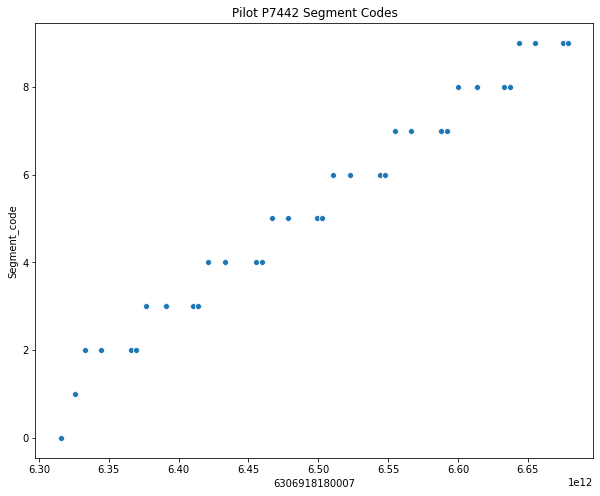

In [81]:
p7442 = pd.read_csv(r'C:\Users\Blake Bullwinkel\Downloads\WSSCGQWVS Corrected Sim Segments\BlueFlightSimData\AFRLAgent_6306616351170_P7442.txt',sep='	',skiprows=2)
p7442_waypoints = p7442[['6306918180007','Segment_code','WayPointCrossingEvent_code']].dropna()
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Pilot P7442 Segment Codes')
sns.scatterplot(x='6306918180007',y='Segment_code',data=p7442_waypoints)

## Pilot P8666

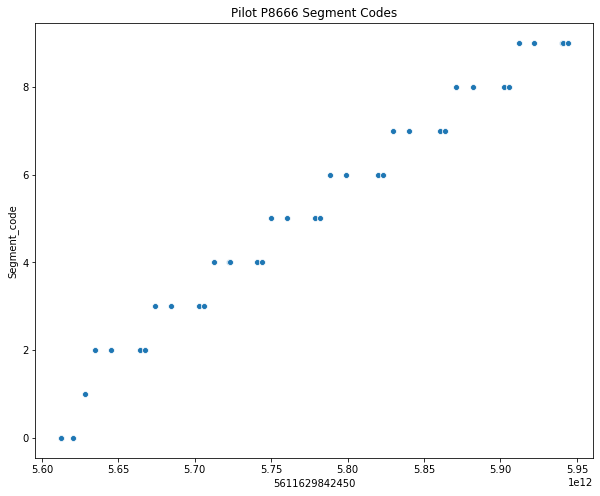

In [88]:
p8666 = pd.read_csv(r'C:\Users\Blake Bullwinkel\Downloads\WSSCGQWVS Corrected Sim Segments\BlueFlightSimData\AFRLAgent_5611620001340_P8666.txt',sep='	',skiprows=2)
p8666_waypoints = p8666[['5611629842450','Segment_code','WayPointCrossingEvent_code']].dropna()
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Pilot P8666 Segment Codes')
sns.scatterplot(x='5611629842450',y='Segment_code',data=p8666_waypoints)

## Pilot P5510

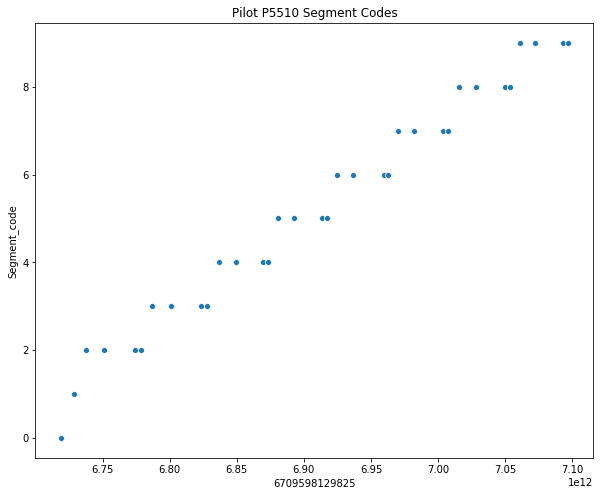

In [86]:
p5510 = pd.read_csv(r'C:\Users\Blake Bullwinkel\Downloads\WSSCGQWVS Corrected Sim Segments\BlueFlightSimData\AFRLAgent_6709586887529_P5510.txt',sep='	',skiprows=2)
p5510_waypoints = p5510[['6709598129825','Segment_code','WayPointCrossingEvent_code']].dropna()
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Pilot P5510 Segment Codes')
sns.scatterplot(x='6709598129825',y='Segment_code',data=p5510_waypoints)

## Pilot P8099

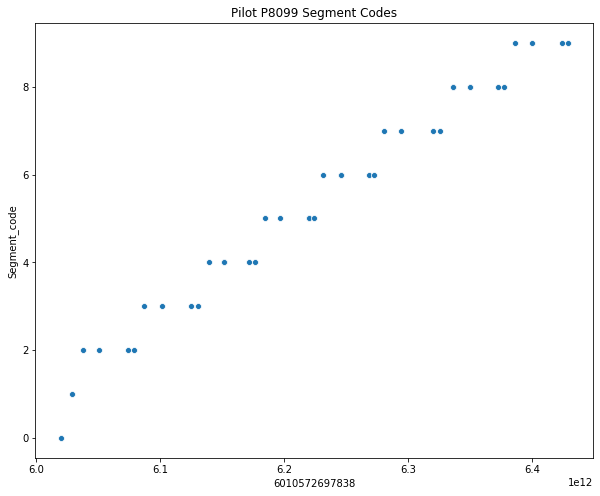

In [90]:
p8099 = pd.read_csv(r'C:\Users\Blake Bullwinkel\Downloads\WSSCGQWVS Corrected Sim Segments\BlueFlightSimData\AFRLAgent_6010571848831_P8099.txt',sep='	',skiprows=2)
p8099_waypoints = p8099[['6010572697838','Segment_code','WayPointCrossingEvent_code']].dropna()
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Pilot P8099 Segment Codes')
sns.scatterplot(x='6010572697838',y='Segment_code',data=p8099_waypoints)

## Pilot P3233

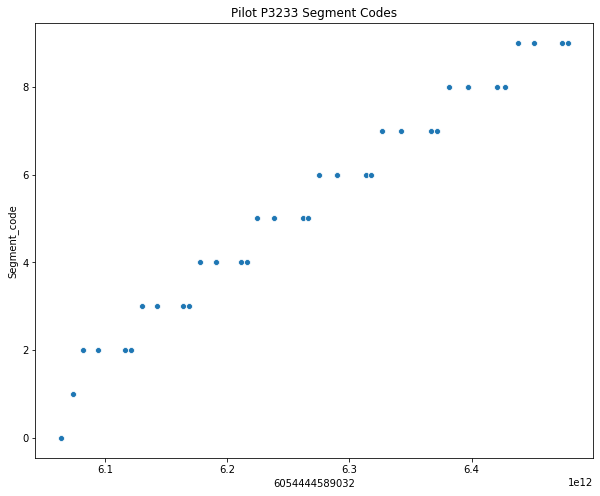

In [91]:
p3233 = pd.read_csv(r'C:\Users\Blake Bullwinkel\Downloads\WSSCGQWVS Corrected Sim Segments\BlueFlightSimData\AFRLAgent_6054129383014_P3233.txt',sep='	',skiprows=2)
p3233_waypoints = p3233[['6054444589032','Segment_code','WayPointCrossingEvent_code']].dropna()
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Pilot P3233 Segment Codes')
sns.scatterplot(x='6054444589032',y='Segment_code',data=p3233_waypoints)

## Pilot P6109

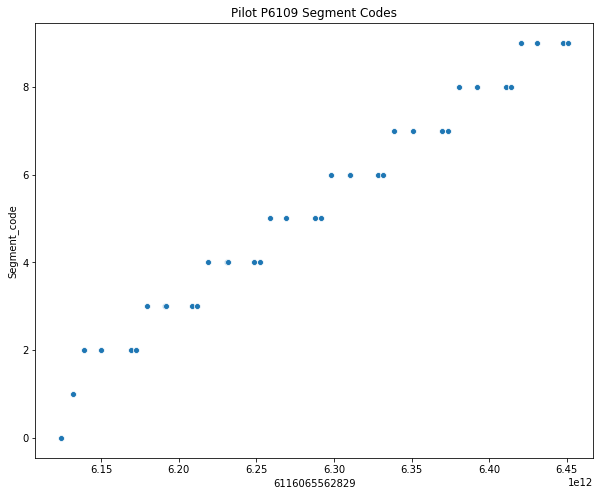

In [96]:
p6109 = pd.read_csv(r'C:\Users\Blake Bullwinkel\Downloads\WSSCGQWVS Corrected Sim Segments\BlueFlightSimData\AFRLAgent_6116054505008_P6109.txt',sep='	',skiprows=2)
p6109_waypoints = p6109[['6116065562829','Segment_code','WayPointCrossingEvent_code']].dropna()
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Pilot P6109 Segment Codes')
sns.scatterplot(x='6116065562829',y='Segment_code',data=p6109_waypoints)

# Creating Relabeled Files
After studying these plots, we notice that we can fix the problem by incrementing each of the final segment code values that is greater than zero by one. This translation is captured by the code_shift() method below.

In [252]:
def code_shift(code):
    if (code['Segment_code'] > 0) and (code['FinalSegment_code'] == 1):
        return code+1
    else:
        return code

For example, compare the segment codes for pilot P6109 plotted above with the plot below:

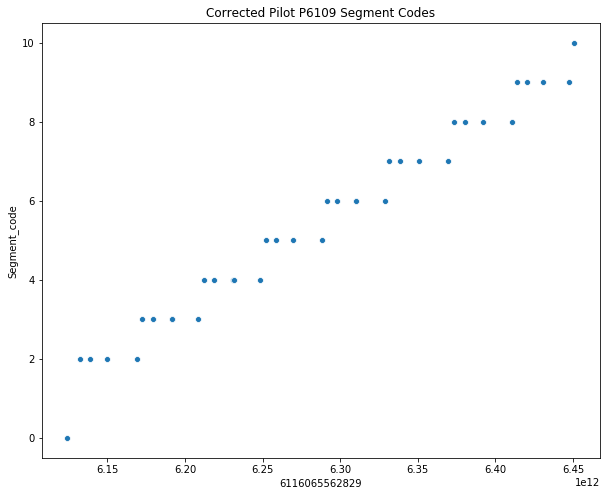

In [254]:
p6109 = pd.read_csv(r'C:\Users\Blake Bullwinkel\Downloads\WSSCGQWVS Corrected Sim Segments\BlueFlightSimData\AFRLAgent_6116054505008_P6109.txt',sep='	',skiprows=2)
p6109_waypoints = p6109[['6116065562829','Segment_code']].dropna()
p6109_waypoints['FinalSegment_code'] = (p6109_waypoints['Segment_code'] - p6109_waypoints['Segment_code'].shift(1)).shift(-1).fillna(1)
p6109_waypoints['Segment_code'] = p6109_waypoints.apply(code_shift,axis=1)['Segment_code']

fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Corrected Pilot P6109 Segment Codes')
sns.scatterplot(x='6116065562829',y='Segment_code',data=p6109_waypoints)

We repeat this process for all eight pilots and save each flight path to a new .txt file. For the final version, we also shift the first event at zero up by one and reset the segment code of the first point at which the simulation is unpaused to zero (see the plot below).

In [289]:
def code_shift(code):
    if (code['Segment_code'] >= 0) and (code['FinalSegment_code'] == 1):
        return code+1
    else:
        return code

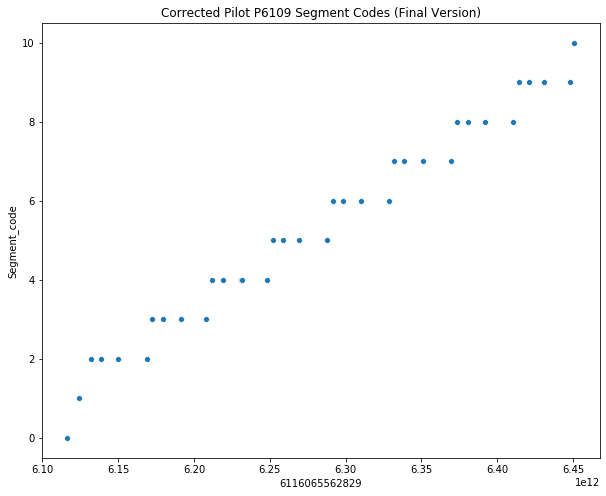

In [293]:
path = pd.read_csv(r'C:\Users\Blake Bullwinkel\Downloads\WSSCGQWVS Corrected Sim Segments\BlueFlightSimData\AFRLAgent_6116054505008_P6109.txt',sep='	',skiprows=2)
path_waypoints = path[['Segment_code']].dropna()
path_waypoints['FinalSegment_code'] = (path_waypoints['Segment_code'] - path_waypoints['Segment_code'].shift(1)).shift(-1).fillna(1)
path_waypoints['Segment_code'] = path_waypoints.apply(code_shift,axis=1)['Segment_code']
indices = path.loc[~path['Segment_code'].isnull()].index
new_codes = pd.Series(path_waypoints['Segment_code'],index=indices)
path.loc[~path['Segment_code'].isnull(),['Segment_code']] = new_codes
index_zero = path[path['IsPaused']==0].index[0]
path.iloc[index_zero, 55] = 0
    
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Corrected Pilot P6109 Segment Codes (Final Version)')
sns.scatterplot(x='6116065562829',y='Segment_code',data=path)

In [295]:
pilot_ids = ['6454302531282_P8543','7167357727955_P5427','6306616351170_P7442','5611620001340_P8666','6709586887529_P5510','6010571848831_P8099','6054129383014_P3233','6116054505008_P6109']

for pilot_id in pilot_ids:
    path = pd.read_csv(r'C:\Users\Blake Bullwinkel\Downloads\WSSCGQWVS Corrected Sim Segments\BlueFlightSimData\AFRLAgent_'+pilot_id+'.txt',sep='	',skiprows=2)
    path_waypoints = path[['Segment_code']].dropna()
    path_waypoints['FinalSegment_code'] = (path_waypoints['Segment_code'] - path_waypoints['Segment_code'].shift(1)).shift(-1).fillna(1)
    path_waypoints['Segment_code'] = path_waypoints.apply(code_shift,axis=1)['Segment_code']
    indices = path.loc[~path['Segment_code'].isnull()].index
    new_codes = pd.Series(path_waypoints['Segment_code'],index=indices)
    path.loc[~path['Segment_code'].isnull(),['Segment_code']] = new_codes
    index_zero = path[path['IsPaused']==0].index[0]
    path.iloc[index_zero, 55] = 0
    path.to_csv('Shifted_AFRLAgent_'+pilot_id+'.txt',na_rep=np.NaN,index=False,sep='	')
